<a href="https://colab.research.google.com/github/PhamTuanKiet02/report/blob/main/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from numpy import save
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from google.colab import drive

drive.mount('/content/drive')
folder = '/content/drive/MyDrive/Face/'

photos, labels = [], []
for file in listdir(folder):
    if file.startswith('phuc'):
        output = 0
    elif file.startswith('duy'):
        output = 1
    elif file.startswith('duc'):
        output = 2
    elif file.startswith('tuankiet'):
        output = 3
    elif file.startswith('thanh'):
        output = 4
    elif file.startswith('vuong'):
        output = 5    
    else:
        continue

    photo = load_img(folder + file, target_size=(100, 130))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = np.asarray(photos)
labels = np.asarray(labels)

save('Face_photos.npy', photos)
save('Face_labels.npy', labels)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 130, 3)))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(photos, labels, epochs=10, batch_size=256, verbose=1)

model.evaluate(photos, labels)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 72.7251 - accuracy: 0.3311
Epoch 2/10
1/1 [==============================] - 0s 89ms/step - loss: 1454.3540 - accuracy: 0.3378
Epoch 3/10
1/1 [==============================] - 0s 91ms/step - loss: 1179.2111 - accuracy: 0.1216
Epoch 4/10
1/1 [==============================] - 0s 71ms/step - loss: 184.5091 - accuracy: 0.5270
Epoch 5/10
1/1 [==============================] - 0s 71ms/step - loss: 93.1926 - accuracy: 0.4054
Epoch 6/10
1/1 [==============================] - 0s 70ms/step - loss: 115.8175 - accuracy: 0.4730
Epoch 7/10
1/1 [==============================] - 0s 67ms/step - loss: 124.0280 - accuracy: 0.4730
Epoch 8/10
1/1 [==============================] - 0s 63ms/step - loss: 49.0375 - accuracy: 0.4865
Epoch 9/10
1/1 [==============================] - 0s 60ms/step - loss: 7.5872 - ac

[4.132438659667969, 0.912162184715271]

In [ ]:
model.save('Face.h5')

In [ ]:
classes = ["phuc","duy","duc","tuankiet","thanh","vuong"]

1/1 [==============================] - 0s 102ms/step
[[0.11176212 0.2886457  0.12041166 0.14350168 0.15795472 0.177724  ]]


'duy'

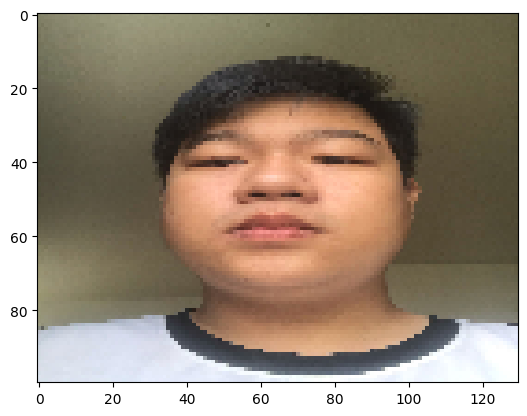

In [ ]:
img = load_img('/content/drive/MyDrive/nhandangmonan/duy1.jpg', target_size=(100,130))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,100,130,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]